In [434]:
import numpy as np

# Optimazing a function

In [435]:
P_min = 0
P_max = 1114111
#num_of_bits = np.floor(np.log2(P_max-P_min)) + 1
num_of_bits = 8
num_of_crm = 64
p_cross = 1.0
p_mutation = 0.04
epsilon = 0.0001
max_gen = 5000
cadena = 'Hello world'
crm_len = len(cadena)*int(num_of_bits)

## Functions

In [436]:
def toBinary(string):
  l,m=[],[]
  for i in string:
    l.append(ord(i))
  for i in l:
    m.append(int(bin(i)[2:]))
  return m

print("''Hello world'' in binary is ") 
print(toBinary("Hello worldaAbBɏ"))

''Hello world'' in binary is 
[1001000, 1100101, 1101100, 1101100, 1101111, 100000, 1110111, 1101111, 1110010, 1101100, 1100100, 1100001, 1000001, 1100010, 1000010, 1001001111]


In [437]:
def list_to_string(s):
 
    # initialization of string to ""
    new = ""
 
    # traverse in the string
    for x in s:
        new += x
 
    # return string
    return new

In [438]:
def decode(chromosome):
    str_crm = str(chromosome)
    str_crm = str_crm.replace(' ','').replace('[','').replace(']','').replace(',','').replace('\n','')
    list_of_letters = []
    for i in np.arange(0,len(cadena)):
        list_of_letters.append(chr(int(str_crm[i*num_of_bits:(i+1)*num_of_bits],2)))
    return list_to_string(list_of_letters)

In [439]:
def f_coded(chromosome):
    fitness = 0
    candidate_string = decode(chromosome)
    for i in np.arange(0,len(candidate_string)):
        if candidate_string[i] == cadena[i]:
            fitness += 1
    return fitness 

In [440]:
def init_population():
        ind = np.random.randint(0, high=2, size=(num_of_crm,crm_len), dtype='l')
        return list(ind) 
i = init_population()
print(i[2].shape)

(88,)


In [441]:
def fitness_of_population(ind):
    fitness = []
    for i in np.arange(0,len(ind)):
        fitness.append(f_coded(ind[i]))
    #print(fitness_of_population)
    return fitness

In [442]:
def roulette(ind):
    selected = []
    fitness_of_pop = fitness_of_population(ind)
    probs = [i/sum(fitness_of_pop) for i in fitness_of_pop]
    #print(probs)
    selected_idx = list(np.random.choice(np.arange(0,len(ind)),size=2,replace=True,p=probs))
    #print(probs[selected_idx[0]],probs[selected_idx[1]])
    selected.append(ind[selected_idx[0]])
    selected.append(ind[selected_idx[1]])
    return selected

In [443]:
def cross(ind):
    next_gen = []
    while len(next_gen) < num_of_crm :
        male, female = roulette(ind)
        female = list(female)
        male = list(male)
        c = np.random.randint(1,crm_len-1)
        daughter = female[0:c] + male[c:]
        son      = male[0:c] + female[c:]
        next_gen.append(np.array(daughter))
        next_gen.append(np.array(son))
    return next_gen

In [444]:
def mutate(ind):
    does_it_mutate = np.random.rand(len(ind),crm_len)
    does_it_mutate = (does_it_mutate < p_mutation)
    subjects = np.mod(does_it_mutate + ind, 2)
    return subjects

In [445]:
def perform_selection():
    mins, maxs, means, best = [], [], [], []
    individuals = init_population()
    while sum(fitness_of_population(individuals))== 0:
        individuals = init_population()
    fitness_of_pop = fitness_of_population(individuals)
    best.append(individuals[np.argmax(fitness_of_pop)])

    max = np.max(fitness_of_pop)
    mean = np.mean(fitness_of_pop)
    min = np.min(fitness_of_pop)

    maxs.append(max)
    means.append(mean)
    mins.append(min)

    for i in range(max_gen):
        next_gen = mutate(cross(individuals))
        individuals = next_gen
        fitness_of_pop = fitness_of_population(individuals)
        best.append(individuals[np.argmax(fitness_of_pop)])

        max = np.max(fitness_of_pop)
        mean = np.mean(fitness_of_pop)
        min = np.min(fitness_of_pop)

        maxs.append(max)
        means.append(mean)
        mins.append(min)
    return mins, maxs, means, best


In [446]:
mins, maxs, means, best = perform_selection()
res = decode(best[-1])
res

?a b.l# 2


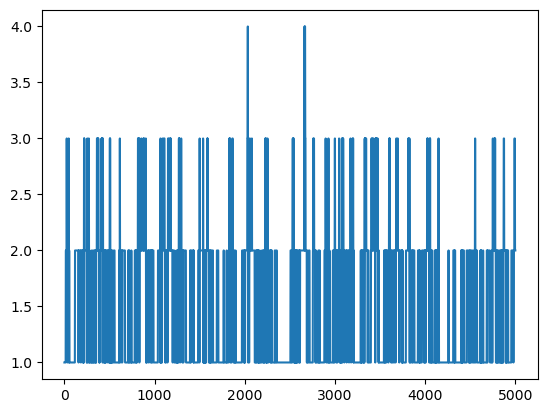

In [ ]:
import matplotlib. pyplot as plt
plt.plot(maxs)
print(decode(best[-1]),f_coded(best[-1]))